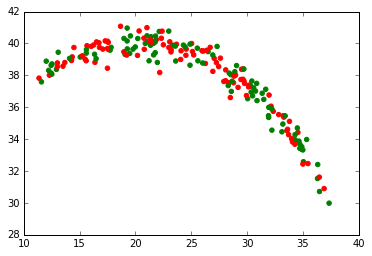

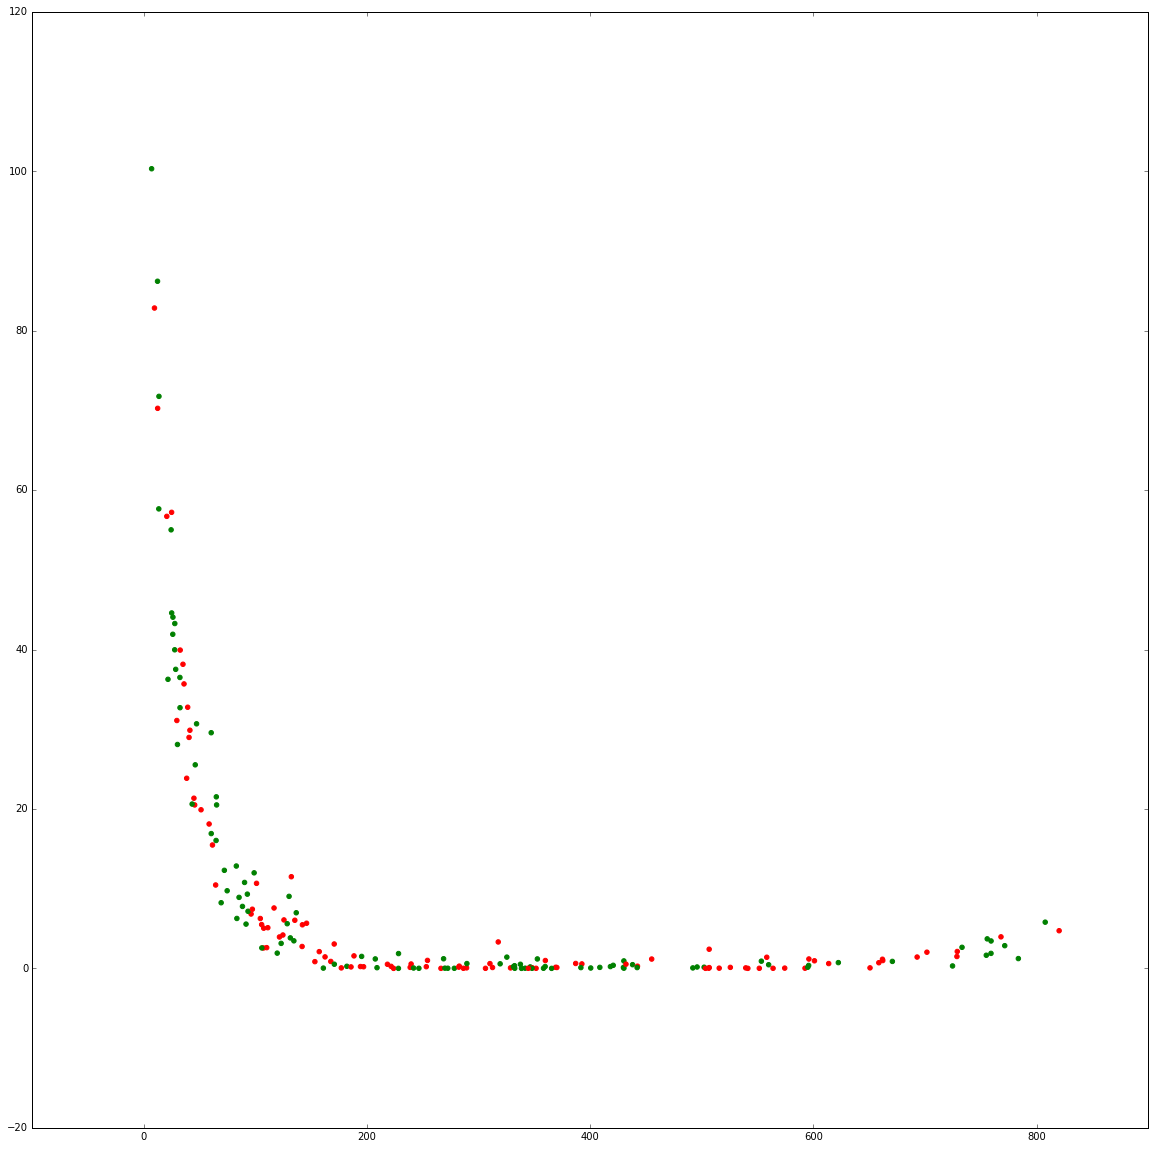

In [9]:
M=40
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(low=10, high=35, size=(200,)) + np.random.normal(loc=2, scale=0.5, size=200)
y = np.sqrt(400 - (x-20)**2)+ np.random.normal(loc=20, scale=0.5, size=200)
plt.scatter(x,y,color=['red','green'])
plt.figure(figsize=(20,20))
p = (x-M)**2
q = (y-M)**2
plt.scatter(p,q,color=['red','green'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# read training and test data
diabetes_train = pd.read_csv("/data/training/diabetes_train.csv")
diabetes_test = pd.read_csv("/data/test/diabetes_test.csv")
print(diabetes_train.head())
print(diabetes_test.head())


# create x and y train 
x_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]

# WRITE YOUR CODE HERE 

# tune the model

# specify the number of folds for k-fold CV
n_folds = 5

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

# create SVC object
linear_model = SVC()

# set up grid search scheme
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = n_folds, 
                        verbose = 1,
                      return_train_score=True)      



# fit the model on n_folds
model_cv.fit(x_train, y_train)

# store CV results in cv_results
cv_results = model_cv.cv_results_
print(pd.DataFrame(model_cv.cv_results_))


# plot C versus train and test scores (code already written)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()
plt.savefig('/code/output/hyperparam_c.png') 

# best hyperparameter C and best (test) accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(best_score)
print(best_C)

#  choose the best value of C 

best_score = model_cv.best_score_
C = model_cv.best_params_['C']

# build a model with best value of C
linear_model = SVC(C=C)
linear_model.fit(x_train, y_train)


# make predictions
print(diabetes_test.head())
predictions = linear_model.predict(diabetes_test.iloc[:, :7])
predictions[:5]

# YOUR CODE ENDS HERE

# write columns id, predictions into the output file
d = pd.DataFrame({'id': diabetes_test['id'], 'Diabetes_Predicted': predictions})
print("\n", "d", "\n", d.head())

# write the output
d.to_csv('/code/output/diabetes_predictions.csv', sep=",")
